# Effondrement gravitationnel d'une étoile

L'objectif de ce travail est d'étudier la dynamique de formation d’un trou noir par effondrement gravitationnel. Les sources principales de cette étude sont l'article d’Oppenheimer & Synder (1939) "On Continued Gravitational Contraction" et le livre "Gravitation" de Charles W Misner and Kip S. Thorne. 

Dans un premier temps, nous chercherons la solution générale d'une étoile statique en relativité générale que nous présentons dans différents systèmes de coordonnées. Cette solution s'exprime sous la forme du système Tolman-Oppenheimer-Volkoff que nous résoudrons ici.

Dans un second temps, nous nous intéresserons à la dynamique d'un tel système à travers le raccordement entre une métrique de Friedmann-Lemaître-Robertson-Walker et la métrique de Schwarzschild à la surface de l'étoile. La première métrique permet de décrire un espace-temps homogène et isotropique en contraction tandis que la deuxième décrit un espace-temps vide et symétrique autour d'un objet de masse M.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

In [2]:
# Constantes
G = 6.67430e-11  # m³/(kg·s²)
c = 2.99792458e8  # m/s
M_sun = 1.989e30  # kg
R_sun = 6.96e8    # m

In [3]:
def schwarzschild_radius(M):
    """r_s = 2GM/c2"""
    return 2 * G * M / c**2

## I- Etude statique et système Tolman-Oppenheimer-Volkoff

### 1- Sytème Tolman-Oppenheimer-Volkoff

#### Métrique
L'espace-temps autour d'un objet massif est décrit par la métrique de Schwarzschild qui s'écrit comme suit :
$$ds^2 = -N(r)^2 c^2 dt^2 + A(r)^2 dr^2 + r^2(d\theta^2 + \sin^2\theta d\phi^2)$$
Les composantes non-nulles de la métrique sont $g_{\mu\nu}$ :
$$
\begin{cases} 
g_{tt} = -N(r)^2 c^2 \\
g_{rr} = A(r)^2 
\end{cases}
\quad
\begin{cases} 
g_{\theta\theta} = r^2 \\
g_{\phi\phi} = r^2 \sin^2\theta 
\end{cases}
$$

Nous cherchons à calculer le tenseur d'Einstein dans l'espace-temps décrit par la métrique de Schwarzschild et pour cela nous devons calculer les symboles de Christoffel, le tenseur de Ricci et le scalaire de Ricci. 

#### Les symboles de Christoffel
Définition :
$$\Gamma^\alpha_{\mu\nu} = \frac{1}{2} g^{\alpha\beta} (\partial_\mu g_{\beta\nu} + \partial_\nu g_{\beta\mu} - \partial_\beta g_{\mu\nu})$$

Les composantes non-nulles sont :
* $\Gamma^t_{tr} = \Gamma^t_{rt} = \frac{1}{N(r)} \frac{dN}{dr}$
* $\Gamma^r_{tt} = c^2 \frac{dN}{dr} \frac{N(r)}{A(r)^2}$
* $\Gamma^r_{rr} = \frac{1}{A(r)} \frac{dA}{dr}$
* $\Gamma^r_{\theta\theta} = -\frac{r}{A(r)^2}$
* $\Gamma^r_{\phi\phi} = -\frac{r \sin^2\theta}{A(r)^2}$
* $\Gamma^\theta_{r\theta} = \Gamma^\theta_{\theta r} = \frac{1}{r}$
* $\Gamma^\theta_{\phi\phi} = -\sin\theta \cos\theta$
* $\Gamma^\phi_{r\phi} = \Gamma^\phi_{\phi r} = \frac{1}{r}$
* $\Gamma^\phi_{\theta\phi} = \Gamma^\phi_{\phi\theta} = \cot\theta$

#### Le tenseur de Ricci
Définition : $R_{\mu\nu} = \partial_\lambda \Gamma^\lambda_{\mu\nu} - \partial_\nu \Gamma^\lambda_{\mu\lambda} + \Gamma^\lambda_{\mu\nu} \Gamma^\sigma_{\lambda\sigma} - \Gamma^\lambda_{\mu\sigma} \Gamma^\sigma_{\nu\lambda}$

Etant donné que le quadrivecteur énergie-impulsion est diagonal, nous pouvons uniquement calculer les termes diagonaux :
$$
\begin{cases}
R_{tt} = c^2 \frac{N(r)}{A(r)^2} \left[ \frac{d^2N(r)}{dr^2} - \frac{1}{A(r)}\frac{dA}{dr}\frac{dN}{dr} + \frac{2}{r}\frac{dN}{dr} \right] \\
R_{rr} = -\frac{1}{N(r)}\frac{d^2N}{dr^2} + \frac{1}{A(r)}\frac{dA}{dr}\frac{dN}{dr} + \frac{2}{rA(r)}\frac{dA}{dr} \\
R_{\theta\theta} = 1 - \frac{1}{A(r)^2} \left( 1 - \frac{r}{A(r)}\frac{dA}{dr} + \frac{r}{N(r)}\frac{dN}{dr} \right) \\
R_{\phi\phi} = \sin^2\theta \, R_{\theta\theta}
\end{cases}
$$

#### Le scalaire de Ricci
Définition : 
$$R = g^{\mu\nu} R_{\mu\nu}$$
Ainsi,  
$$R = \frac{2}{r^2} \left( 1 - \frac{1}{A(r)^2} \right) - \frac{2}{A(r)^2} \left( \frac{1}{N(r)}\frac{d^2N}{dr^2} + \frac{2}{r}\left(\frac{1}{N(r)}\frac{dN}{dr} - \frac{1}{A(r)}\frac{dA}{dr}\right) - \frac{1}{A(r)}\frac{dA}{dr}\frac{1}{N(r)}\frac{dN}{dr} \right)$$

On a maintenant tous les éléments pour calculer le tenseur d'Einstein

#### Le tenseur d'Einstein
Définition : $G_{\mu\nu} = R_{\mu\nu} - \frac{1}{2} R g_{\mu\nu}$

Les deux premières composantes sont :
$$G^t_t = -\left[ \frac{1}{r^2} \left( 1 - \frac{1}{A(r)^2} \right) + \frac{2}{rA(r)^3} \frac{dA}{dr} \right]$$
$$G^r_r = -\frac{1}{r^2} \left( 1 - \frac{1}{A(r)^2} \right) + \frac{2}{rA(r)^2 N(r)} \frac{dN}{dr}$$

Nous allons maintenant utiliser les équations d'Einstein afin d'obtenir le système d'équations T.O.V

#### Le tenseur énergie-impulsion
Dans le cas d'un fluide parfait au repos :
$$T^\mu_\nu = \text{diag}(-\rho c^2, P, P, P)$$

#### Les équations d'Einstein
$$G^\mu_\nu = \frac{8\pi G}{c^4} T^\mu_\nu$$

A partir de ces équations, calculons le système T.O.V.
Notons :
$$A(r)^2 = \frac{1}{1 - \frac{2Gm(r)}{c^2 r}}, \quad N(r) = e^{\phi(r)}$$

Par conséquent :

**Composante radial ($G^r_r = \frac{8\pi G}{c^4} T^r_r$) :**
$$G^r_r = -\frac{2Gm(r)}{c^2 r^3} + \frac{2}{r} \left( 1 - \frac{2Gm(r)}{c^2 r} \right) \frac{d\phi}{dr} = \frac{8\pi G}{c^4} P$$
Cela nous donne l'équation différrentielle pour $\phi$ :
$$\boxed{\frac{d\phi}{dr} = \frac{G}{c^2} \frac{m(r) + 4\pi r^3 P/c^2}{r^2 \left( 1 - \frac{2Gm(r)}{c^2 r} \right)}}$$

**Composante temporelle ($G^t_t = \frac{8\pi G}{c^4} T^t_t$) :**
$$G^t_t = -\frac{2Gm(r)}{c^2 r^3} - \frac{2}{r} \left( 1 - \frac{2Gm(r)}{c^2 r} \right) \left( \frac{G}{c^2 r^2} \frac{\frac{dm}{dr} - m}{1 - \frac{2Gm(r)}{c^2 r}} \right) = \frac{8\pi G}{c^2} \rho$$
Cela nous donne l'équation différrentielle pour :
$$\boxed{\frac{dm}{dr} = 4\pi r^2 \rho(r)}$$

Enfin, afin de compléter le système, nous allons utiliser la conservation de la matière contenue dans la première identité de Bianchi

#### La première identité de Bianchi :
$$\nabla_\mu T^{\mu r} = 0 \implies \nabla_\mu T^\mu_r = \partial_\mu T^\mu_r + \Gamma^\mu_{\mu\lambda} T^\lambda_r - \Gamma^\lambda_{\mu r} T^\mu_\lambda = 0$$

Cela nous donne l'équation finale pour P :
$$\boxed{\frac{dP}{dr} = -(P + \rho c^2) \phi'}$$

Ainsi, le système Tolman-Oppenheimer-Volkoff s'écrit :
$$
\begin{cases}
\displaystyle \frac{dm}{dr} = 4\pi r^2 \rho(r) \\
\displaystyle \frac{dP}{dr} = - \left( \rho(r) + \frac{P(r)}{c^2} \right) \frac{d\phi}{dr} \\
\displaystyle \frac{d\phi}{dr} = \frac{Gm(r)}{r^2} \left( 1 - \frac{2Gm(r)}{rc^2} \right)^{-1} \left( 1 + \frac{4\pi P(r)r^3}{m(r)c^2} \right)
\end{cases}
$$

Les conditions aux limites sont les suivantes :
* $P(0) = P_c$
* $m(0) = 0$
* $\phi(R) = \frac{c^2}{2} \ln \left( 1 - \frac{2GM}{Rc^2} \right)$



**Système homogène et statique :**
On considère une densité constante $\rho_c$. Le profil de masse est alors :
$$m(r) = 
\begin{cases} 
\frac{4}{3} \pi r^3 \rho_c, & r \le R \\
M, & r > R
\end{cases}$$

En injectant $m(r)$ et $\frac{d\phi}{dr}$ dans l'équation de la pression :
$$\frac{dP}{dr} = - \left( \rho_c + \frac{P(r)}{c^2} \right) \frac{G \frac{4}{3}\pi r^3 \rho_c}{r^2} \left( 1 - \frac{2G \frac{4}{3}\pi r^3 \rho_c}{rc^2} \right)^{-1} \left( 1 + \frac{4\pi P(r)r^3}{\frac{4}{3}\pi r^3 \rho_c c^2} \right)$$

En simplifiant, on obtient l'équation différentielle séparable suivante :
$$\frac{dP}{\rho_c c^2 \left( 1 + \frac{P}{\rho_c c^2} \right) \left( 1 + \frac{3P}{\rho_c c^2} \right)} = - \frac{G \frac{4}{3}\pi \rho_c r}{c^2 \left( 1 - \frac{8\pi G \rho_c}{3c^2} r^2 \right)} dr$$

On introduit les variables adimensionnées $\tilde{P} = \frac{P}{\rho_c c^2}$, $\tilde{r} = \frac{r}{R}$ et la compacité locale via $\Xi = \frac{4\pi G \rho_c}{3c^2}$ :
$$\frac{-2 d\tilde{P}}{(1+\tilde{P})(1+3\tilde{P})} = 2\Xi \frac{\tilde{r} d\tilde{r}}{1 - 2\Xi \tilde{r}^2}$$

En utilisant l'identité $\frac{2}{(1+\tilde{P})(1+3\tilde{P})} = \frac{3}{1+3\tilde{P}} - \frac{1}{1+\tilde{P}}$, l'intégration donne :
$$\ln \left| \frac{1+\tilde{P}}{1+3\tilde{P}} \right| - \ln \left( \frac{1+\tilde{P}_0}{1+3\tilde{P}_0} \right) = \frac{1}{2} \ln(1 - 2\Xi \tilde{r}^2)$$

En posant $\alpha$ la constante d'intégration :
$$\frac{1 + \tilde{P}(\tilde{r})}{1 + 3\tilde{P}(\tilde{r})} = \alpha \sqrt{1 - 2\Xi \tilde{r}^2} \quad \Leftrightarrow \quad \tilde{P}(\tilde{r}) = \frac{\alpha \sqrt{1 - 2\Xi \tilde{r}^2} - 1}{3 - \alpha \sqrt{1 - 2\Xi \tilde{r}^2}}$$

Par la condition $\tilde{P}(R) = 0$, on détermine $\alpha = \frac{1}{\sqrt{1 - 2\Xi}}$, d'où le profil de pression :
$$\tilde{P}(\tilde{r}) = \frac{\sqrt{1-2\Xi \tilde{r}^2} - \sqrt{1-2\Xi}}{3\sqrt{1-2\Xi} - \sqrt{1-2\Xi \tilde{r}^2}}$$

La pression centrale est alors :
$$\tilde{P}(0) = \frac{1 - \sqrt{1-2\Xi}}{3\sqrt{1-2\Xi} - 1}$$



**Limite de compacité (Limite de Buchdahl) :**
Pour que la pression centrale reste finie ($P(0) < \infty$) :
$$3\sqrt{1-2\Xi} > 1 \implies 1-2\Xi > \frac{1}{9} \implies \Xi < \frac{4}{9}$$
Soit la condition de compacité maximale :
$$\frac{GM}{Rc^2} < \frac{4}{9}$$

**Masse maximale :**
En combinant $\Xi < \frac{4}{9}$ avec la relation $R = \left( \frac{3M}{4\pi \rho_c} \right)^{1/3}$ :
$$M < \frac{4c^2}{9G} R \implies M < \left( \frac{2c}{3} \right)^3 G^{-3/2} \left( \frac{3}{4\pi \rho_c} \right)^{1/2} = M_{max}$$

Nous obtenons ainsi la formule de la pression en fonction du paramètre de compacité de l'objet massif et pouvons dès lors la tracer pour différentes compacités. 

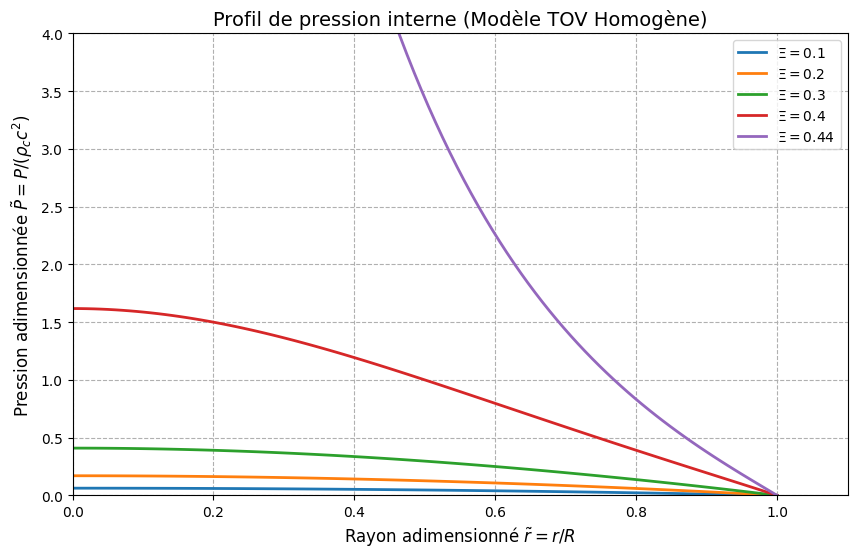

In [4]:
def pressure_profile(r_tilde, xi):
    numerator = np.sqrt(1 - 2 * xi * r_tilde**2) - np.sqrt(1 - 2 * xi)
    denominator = 3 * (np.sqrt(1 - 2 * xi)) - np.sqrt(1 - 2 * xi * r_tilde**2) 
    return numerator / denominator

# Paramètres de simulation
r_points = np.linspace(0, 1, 100)  # Rayon adimensionné r/R de 0 à 1
compactness_values = [0.1, 0.2, 0.3, 0.4, 0.44] # Différentes valeurs de Xi

plt.figure(figsize=(10, 6))

for xi in compactness_values:
    label = f'$\\Xi = {xi}$'
    y = pressure_profile(r_points, xi)
    plt.plot(r_points, y, label=label, lw=2)

# Mise en forme du graphique
plt.title("Profil de pression interne (Modèle TOV Homogène)", fontsize=14)
plt.xlabel("Rayon adimensionné $\\tilde{r} = r/R$", fontsize=12)
plt.ylabel("Pression adimensionnée $\\tilde{P} = P / (\\rho_c c^2)$", fontsize=12)
plt.grid(linestyle='--')
plt.legend()
plt.ylim(0, 4) # On coupe l'axe Y pour la visibilité car P(0) tend vers l'infini
plt.xlim(0, 1.1)

plt.show()

La pression centrale croît avec la compacité et diverge lorsque $\Xi $ s'approche de $\frac{4}{9} \approx 0.44$. Un système statique a bien une masse maximale pour exister. 
Attachons nous dans la suite à représenter l'espace-temps de ce système massif. La symétrie du système nous permet de conserver uniquement la partie radiale de la métrique. De plus, la statique du système permet de s'affranchir de toute dépendance temporelle. Ainsi, il suffit de tracer la fonction $\frac{dz}{dr}$ pour représenter la courbure de l'espace-temps dû à la présence du système massif.

Nous utilisons une résolution numérique de l'équation différentielle sur $z(r)$ et traçons un diagramme de plongement du système statique.

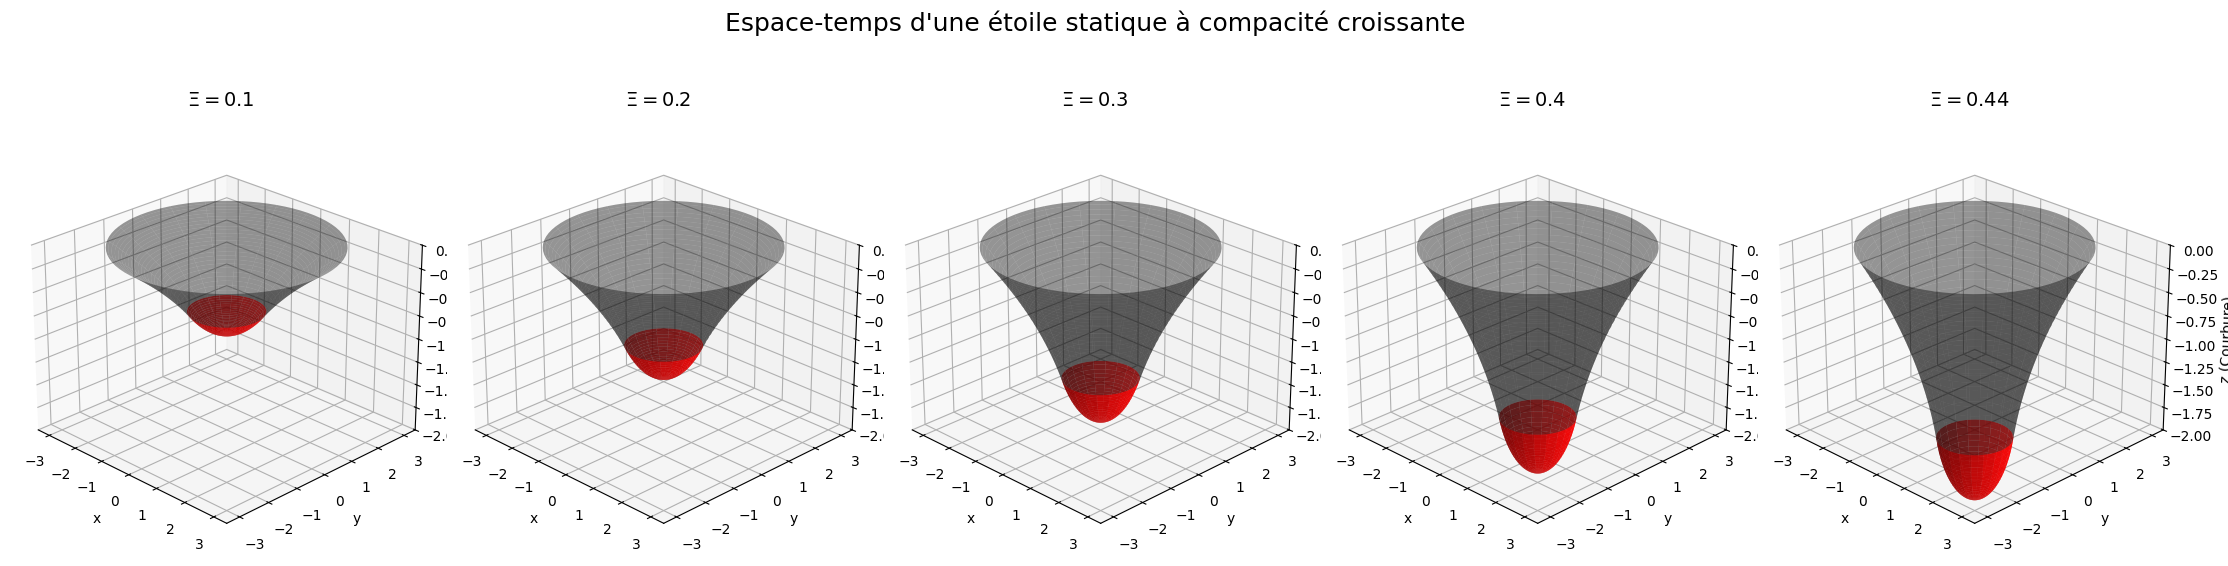

In [ ]:
# Paramètres physiques
compactness_list = [0.1, 0.2, 0.3, 0.4, 0.44] 
R_star = 1.0  # Rayon de l'étoile normalisé
R_max = 3.0   # Rayon extérieur maximum pour le tracé

def get_z_profile_aligned(xi):
    """Calcule le profil z(r) et l'aligne pour que z(R_max) = 0."""
    
    def dz_dr_in(r, z):
        val = 1 / (1 - 2 * xi * r**2 / R_star**2) - 1
        return np.sqrt(max(val, 0))

    def dz_dr_out(r, z):
        val = 1 / (1 - 2 * xi * R_star / r) - 1
        return np.sqrt(max(val, 0))

    # Intégration
    r_in = np.linspace(0, R_star, 100)
    sol_in = solve_ivp(dz_dr_in, [0, R_star], [0], t_eval=r_in)
    
    r_out = np.linspace(R_star, R_max, 100)
    z_at_R = sol_in.y[0][-1]
    sol_out = solve_ivp(dz_dr_out, [R_star, R_max], [z_at_R], t_eval=r_out)
    
    # ALIGNEMENT : on soustrait la valeur finale pour que le bord soit à z=0
    z_final = sol_out.y[0][-1]
    z_in_aligned = sol_in.y[0] - z_final
    z_out_aligned = sol_out.y[0] - z_final
    
    return sol_in.t, z_in_aligned, sol_out.t, z_out_aligned

# Création de la figure
fig = plt.figure(figsize=(22, 7))
theta = np.linspace(0, 2 * np.pi, 80)

for i, xi in enumerate(compactness_list):
    ax = fig.add_subplot(1, len(compactness_list), i + 1, projection='3d')
    
    r_i, z_i, r_o, z_o = get_z_profile_aligned(xi)
    
    # Révolution intérieure
    R_i, Theta_i = np.meshgrid(r_i, theta)
    X_i, Y_i = R_i * np.cos(Theta_i), R_i * np.sin(Theta_i)
    Z_i = np.tile(z_i, (len(theta), 1))

    # Révolution extérieure
    R_o, Theta_o = np.meshgrid(r_o, theta)
    X_o, Y_o = R_o * np.cos(Theta_o), R_o * np.sin(Theta_o)
    Z_o = np.tile(z_o, (len(theta), 1))

    # Tracé des surfaces
    ax.plot_surface(X_i, Y_i, Z_i, color='red', alpha=0.8, rstride=4, cstride=4, antialiased=True)
    ax.plot_surface(X_o, Y_o, Z_o, color='black', alpha=0.4, rstride=4, cstride=4, antialiased=True)
    
    # Configuration des axes
    ax.set_title(f"$\\Xi = {xi}$", fontsize=14, pad=20)
    ax.set_zlim(-2, 0) # Échelle fixe pour comparer la profondeur
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z (Courbure)')
    
    # Ajustement de la vue
    ax.view_init(elev=25, azim=-45)

plt.suptitle("Espace-temps d'une étoile statique à compacité croissante", fontsize=18, y=0.95)
plt.tight_layout()
plt.show()

Nous traçons ici l'espace-temps jusqu'à $\tilde{R}=\frac{R}{R_s} = 3$ afin de pouvoir comparer les différentes situations. La partie en rouge représente le sytème massif homogène symétrique avec un rayon adimensionné et pris égal à 1. Le diagramme de plongement souligne bien l'apparition d'une singularité au centre lorsque la compacité s'approche de sa valeur maximale. 

## II -Etude de la dynamique de la surface--chute libre

Etudions dans un premier temps dans la coordonnée temporelle de Schwarzchild la dynamique de la surface. A la surface, comme la masse contenue par dessous est constante et que l'on suppose le vide à l'exterieur, on a simplement a étudier une chute libre. On suit encore une métrique de Schwarzchild grâce au théorème de Birkhof.
$$ ds^2 = -\left(1 - \frac{2GM}{rc^2}\right)c^2dt^2 + \left(1 - \frac{2GM}{rc^2}\right)^{-1}dr^2 + r^2d\Omega^2 $$


### Equations générales

On commence par se doter du lagrangien correspondant : $\mathcal{L}=\sqrt{-g_{\mu\nu}u^{\mu}u^{\nu}}$ que l'on parametrise par $\tau$ par soucis de convenance. On a donc $\mathcal{L}=\sqrt{\frac{d^2s}{d\lambda^2}}=c$. En y injectant la metrique de Schwarzchild :
$$\mathcal{L} = \sqrt{\left(1 - \frac{R_s}{r}\right)c^2\dot{t}^2 - \left(1 - \frac{R_s}{r}\right)^{-1}\dot{r}^2 - r^2\frac{d\Omega^2}{d\lambda^2}}$$

On se ramène au cas $\theta = \phi=0$ par changement de coordonnées, on obtient :

$$\frac{d}{d\lambda}\left(\frac{\partial \mathcal{L}}{\partial \dot{x}^\mu}\right) = \frac{\partial \mathcal{L}}{\partial x^\mu} \implies 
\begin{cases} 
\frac{1}{2}\left(\frac{dr}{d\lambda}\right)^2 + V(r) = \frac{1}{2}\left(\frac{\epsilon^2}{c^2} - c^2\right) \\ 
V(r) = -\frac{GM}{r} + \frac{l^2}{2r^2} - \frac{GMl^2}{r^3c^2} 
\end{cases}$$

où $\epsilon$ et $l$ sont des constantes du mouvement données par :
$$\begin{cases} 
l = r^2\dot{\phi} \\ 
\frac{\epsilon}{c^2} = \left(1 - \frac{R_s}{r}\right)\dot{t} 
\end{cases}$$

### Cas $l=0$ et $u^r_0=0$

Dans le cas particulier où $l = v_0^\phi = 0$ (ce qui correspond a notre chute libre de la surface sans rotation), on a $e = c^2 \sqrt{1 - \frac{R_s}{r_0}}$.  
Après manipulations, on a :

$$
\begin{cases} 
\frac{dr}{d\tau} = -c \sqrt{\frac{R_s}{r} - \frac{R_s}{r_0}} & (1) \\ 
\frac{dt}{d\tau} = \frac{\sqrt{1 - \frac{R_s}{r_0}}}{1 - \frac{R_s}{r}} & (2) 
\end{cases}
$$

On intègre $(1)$ en posant $\tau(0) = 0$ :

$$c\tau = -\int_{r_0}^{r} \frac{dr}{\sqrt{\frac{R_s}{r} - \frac{R_s}{r_0}}}$$

En posant : 
$\begin{cases} r = r_0 \sin^2 \theta \\ dr = 2r_0 \cos \theta \sin \theta \, d\theta \end{cases}$

$$c\tau = -2r_0 \sqrt{\frac{r_0}{R_s}} \int_{\arcsin \sqrt{\frac{r}{r_0}}}^{\pi/2} \sin^2 \theta \, d\theta$$

D'où :

$$\tau = \frac{1}{c} r_0 \sqrt{\frac{r_0}{R_s}} \left[ \arccos \sqrt{\frac{r}{r_0}} + \sqrt{\frac{r}{r_0}} \sqrt{1 - \frac{r}{r_0}} \right] \quad (3)$$

Pour avoir l'allure de cette solution traçons la :
    On definit la fonction $\texttt{ff\_proper\_time}$

In [6]:
def ff_proper_time(r0, r, M):
    """tau = r0/c * sqrt(r0/r_s)[pi/2 - arcsin(sqrt(r/r0))+sqrt(r/r0)*sqrt(1-r/r0)]"""
    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    # Protéger contre les valeurs invalides
    x = np.clip(r / r0, 0, 1)  # Garder 0 <= r/r0 <= 1
    
    with np.errstate(divide='ignore', invalid='ignore'):
        result = r0 / c * np.sqrt(r0/r_s) * (np.pi/2 - np.arcsin(x) + x * np.sqrt(1 - x**2))
    
    return result

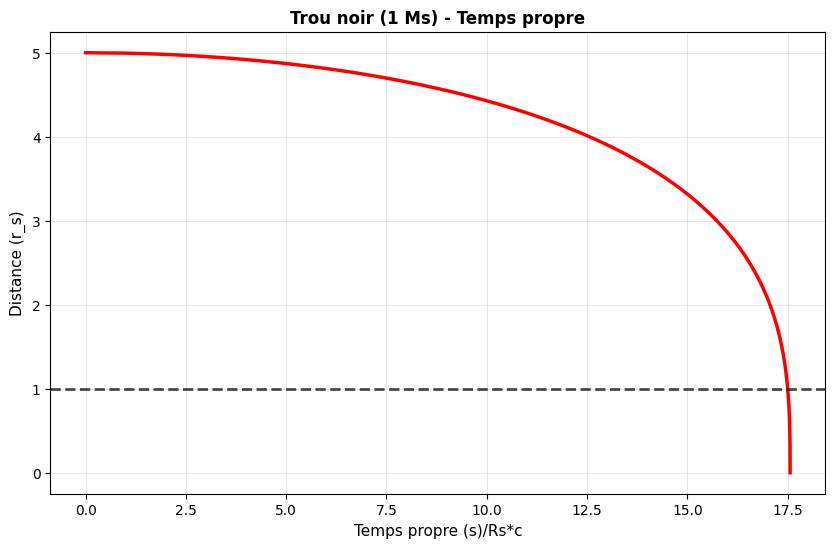

In [7]:
# Tracé du temps propre pour un trou noir de 1 masse solaire

fig ,ax = plt.subplots(figsize=(10, 6))
M_bh = M_sun
r_s = schwarzschild_radius(M_bh)
r_bh = np.linspace(5*r_s, r_s*0.001, 1000)  # Decroissant de 5*r_s a r_s
tau_bh = ff_proper_time(5*r_s, r_bh, M_bh)
ax.plot(tau_bh/r_s*c, r_bh/r_s, 'r-', linewidth=2.5)
ax.axhline(1, color='black', linestyle='--', linewidth=2, alpha=0.7)
ax.set_xlabel('Temps propre (s)/Rs*c', fontsize=11)
ax.set_ylabel('Distance (r_s)', fontsize=11)
ax.set_title('Trou noir (1 Ms) - Temps propre', fontweight='bold')
ax.grid(True, alpha=0.3)
plt.show()

On voit que l'observateur rentre bien dans une zone ou $r<R_s$ et sa chute s'accelerre de facon tres importante et se passe dans un temps finit. Mais n'oublions pas notre objectif : nous voulons conniatre $t(r)$ pour savoir ce que percoit un observateur a l'infini par exemple.

On a toujours l'equation implicite :$$\frac{dt}{d\tau} = \frac{\sqrt{1 - \frac{R_s}{r_0}}}{1 - \frac{R_s}{r}}$$
Si son integration peut parrraitre allechante ou l'on procede similairement que pour $\tau$, il est preferable de proceder par integration numérique : 

On definit la fonction $\texttt{ff\_cordinate\_time}$

In [8]:
def ff_cordinate_time(r0, r, M):
    """
    Calcul du temps coordonné par intégration numérique.
    r décroît de r0 vers r_s
    dt/dr = sqrt(1-r_s/r0) / (1-r_s/r) * (-1/(c*sqrt(r_s/r - r_s/r0)))
    """
    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    # Vérification: r0 doit être > r_s
    if r0 <= r_s:
        raise ValueError(f"r0 ({r0}) doit être > r_s ({r_s})")
    
    with np.errstate(divide='ignore', invalid='ignore'):
        # r_s/r - r_s/r0 > 0 quand r < r0 (descente)
        sqrt_arg = r_s / r - r_s / r0
        sqrt_arg = np.clip(sqrt_arg, 1e-10, None)
        
        # dt/dr négatif (r décroît)
        dt_dr = np.sqrt(1 - r_s/r0) / (1 - r_s/r) * (-1) / (c * np.sqrt(sqrt_arg))
        
        # Intégration (valeur absolue pour temps positif)
        dr = np.gradient(r)
        t_coord = np.cumsum((dt_dr * dr))
        t_coord = t_coord - t_coord[0]
    
    return t_coord


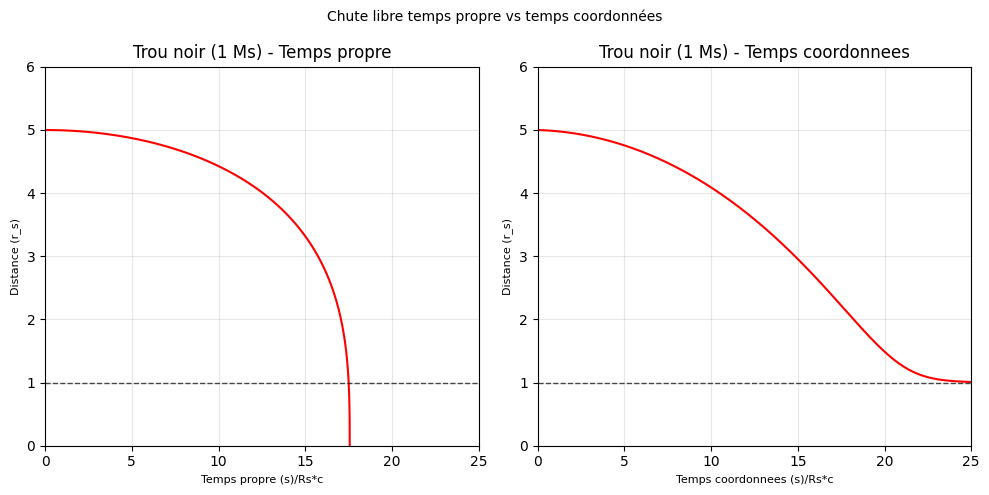

In [9]:
# Tracé du temps coordonné pour un trou noir de 1 masse solaire et comparaison avec le temps propre
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Chute libre temps propre vs temps coordonnées', fontsize=10)

# Trou noir 1 M☉ - proper time
ax = axes[0]
M_bh = M_sun
r_s = schwarzschild_radius(M_bh)
r_bh = np.linspace(5*r_s, r_s*0.001, 1000)  
tau_bh = ff_proper_time(5*r_s, r_bh, M_bh)
ax.plot(tau_bh/r_s*c, r_bh/r_s, 'r-', linewidth=1.5)
ax.axhline(1, color='black', linestyle='--', linewidth=1, alpha=0.7)
ax.set_xlabel('Temps propre (s)/Rs*c', fontsize=8)
ax.set_ylabel('Distance (r_s)', fontsize=8)
ax.set_title('Trou noir (1 Ms) - Temps propre')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 25)
ax.set_ylim(0, 6)


# Trou noir 1 M☉ - coordinate time
ax = axes[1]
M_bh = M_sun
r_s = schwarzschild_radius(M_bh)
r_bh = np.linspace(5*r_s, r_s, 1000)  
t_coord = ff_cordinate_time(5*r_s, r_bh, M_bh)
ax.plot(t_coord/r_s*c, r_bh/r_s, 'r-', linewidth=1.5)
ax.axhline(1, color='black', linestyle='--', linewidth=1, alpha=0.7)
ax.set_xlabel('Temps coordonnees (s)/Rs*c', fontsize=8)
ax.set_ylabel('Distance (r_s)', fontsize=8)
ax.set_title('Trou noir (1 Ms) - Temps coordonnees')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 25)
ax.set_ylim(0, 6)


plt.tight_layout()
plt.show()

Une fois que ces resultats premilinaires etablis, on appercoit que pour decrire de maniere generale la chute libre de la surface dans un systeme de coordonées plus generale que le temps propre, les coordonées classiques amenent à des cas pathologiques. Tracons les geodesiques pour s'en rendre compte encore mieux. D'un point de vue naif on sattend a ce que la lumiere puisse "s'echapper" que lorsque $r>R_s$ et qu'un photon plongeant dans le trou noir le penetre reelement.

### Geodesiques

Traçons donc les cones de lumieres dans les coordonére classiques qui sont definies par $ds^2=0$ ou :
$$\frac{1}{c}\frac{dr}{dt}=\pm\left|1-\frac{R_s}{r}\right|$$

Cela amene techniquement a qutre solutions que l'on divise comme suit :

$r>R_s$ : $$r-r_0+R_s \ln{\frac{r-R_s}{r_0-R_s}}=c(t-t_0) \quad \text{et} \quad r-r_0-R_s \ln{\frac{r-R_s}{r_0-R_s}}=c(t-t_0)$$

$r<R_s$ : $$r-r_0-R_s \ln{\frac{R_s-r}{R_s-r_0}}=c(t-t_0) \quad \text{et} \quad r-r_0+R_s \ln{\frac{R_s-r}{R_s-r_0}}=c(t-t_0)$$

Ces equations definissent les parties rentrantes et sortantes de nos cones de lmumieres pour les deux differentes situations. Implementons cela avec les fonctions $\texttt{schwarzchild\_geo\_p(m)}$ et $\texttt{schwarzchild\_geo\_p(m)\_inf}$:

In [10]:
# Géodésiques nulles (lumière) dans le champ de Schwarzschild

def schwarzchild_geo_p(t0,r0, r, M):
    """Géodésique nulle sortantes: t augmente quand r augmente"""

    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    t = t0+ (r-r0) / c + r_s/c*np.log((r-r_s)/(r0-r_s))
    return t

def schwarzchild_geo_m(t0,r0, r, M):
    """Géodésique nulle entrante: t augmente quand r diminue"""

    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    
    t = t0 + (r0 - r) / c - r_s/c*np.log(np.abs((r-r_s)/(r0-r_s)))
    return t

def schwarzchild_geo_p_inf(t0,r0, r, M):
    """Géodésique nulle sortantes: t augmente quand r augmente"""

    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    t = t0+ (r0-r) / c + r_s/c*np.log((r_s-r)/(-r0+r_s))
    return t

def schwarzchild_geo_m_inf(t0,r0, r, M):
    """Géodésique nulle entrante: t augmente quand r diminue"""
    
    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    
    t = t0 + (r - r0) / c - r_s/c*np.log(np.abs((r_s-r)/(-r0+r_s)))
    return t

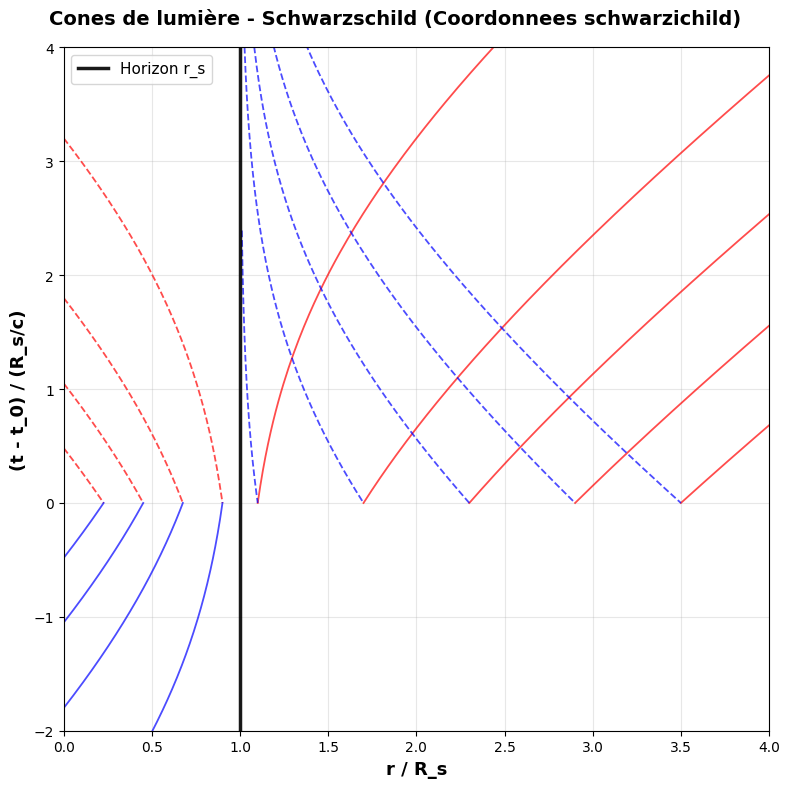

In [11]:
fig, axe = plt.subplots(figsize=(8, 8))
fig.suptitle('Cones de lumière - Schwarzschild (Coordonnees schwarzichild)', fontsize=14, fontweight='bold')

M_bh = M_sun
r_s = schwarzschild_radius(M_bh)

# Points de départ (r0, t0) décalés - pour avoir l'effet ondulant
r0_values = np.linspace(1.1*r_s, 3.5*r_s, 5)
t0 = 0
for r0 in r0_values:
    # Géodésiques sortantes (vont vers l'extérieur)
    r_out = np.linspace(r0, 4*r_s, 200)
    t_out = schwarzchild_geo_p(t0, r0, r_out, M_bh)
    axe.plot(r_out/r_s, t_out/(r_s/c), 'r-', linewidth=1.3, alpha=0.7)
    
    # Géodésiques entrantes (vont vers l'horizon)
    r_in = np.linspace(1.01*r_s, r0, 200)  # Vont VERS r_s (décroissant)
    t_in = schwarzchild_geo_m(t0,r0, r_in, M_bh)
    t_in = t_in + t0
    axe.plot(r_in/r_s, t_in/(r_s/c), 'b--', linewidth=1.3, alpha=0.7)

r0_values_inf = np.linspace(0.001*r_s, 0.9*r_s, 5)

for r0 in r0_values_inf:
    # Géodésiques sortantes (vont vers l'extérieur)
    r_out = np.linspace( 0,r0, 200)
    t_out = schwarzchild_geo_p_inf(t0, r0, r_out, M_bh)
    axe.plot(r_out/r_s, t_out/(r_s/c), 'r--', linewidth=1.3, alpha=0.7)
    
    # Géodésiques entrantes (vont vers l'horizon)
    r_in = np.linspace(0, r0, 200)  # Vont VERS r_s (décroissant)
    t_in = schwarzchild_geo_m_inf(t0,r0, r_in, M_bh)
    t_in = t_in + t0
    axe.plot(r_in/r_s, t_in/(r_s/c), 'b-', linewidth=1.3, alpha=0.7)

# Horizon des événements
axe.axvline(1, color='black', linestyle='-', linewidth=2.5, alpha=0.9, label='Horizon r_s')


axe.set_xlabel('r / R_s', fontsize=13, fontweight='bold')
axe.set_ylabel('(t - t_0) / (R_s/c)', fontsize=13, fontweight='bold')
axe.set_xlim(0, 4)
axe.set_ylim(-2, 4)
axe.grid(True, alpha=0.3)
axe.legend(fontsize=11, loc='upper left')

plt.tight_layout()
plt.show()

On voit que ces coordonées ne sont pas adaptées pour décrire la géodésique entrante, car t diverge quand r approche r_s. C'est un artefact de la coordonnée t, pas une singularité physique. On introduit alors un autre systeme qui retranscrira mieux ce qui a été evoqué plus tot : les coordonnées de Eddington Finkelstein.

Pour cela on definit $\tilde{t}=t+\frac{R_S}{c}\ln\left|\frac{r}{R_S}-1\right|$. Le terme une fois différencié compensera les divergences en $r\to R_S$ Cette nouvelle coordonée apporte aussi des termes croisés tels que la metrique s'ecrit dorenavant : $$ds^2 = -\left(1-\frac{R_S}{r}\right)d\tilde{t}^2 + 2\left(1-\frac{R_S}{r}\right)d\tilde{t}dr + \left(1+\frac{R_S}{r}\right)dr^2 +r^2 d\Omega^2$$

Traçons les geodesiques dans ce nouveau systeme de coordonées pour verifier que nous avons bien des geodesiques entrantes qui ne diverge pas en $r\to R_S$ :

In [12]:
def ef_geo_p(t0,r0, r, M):
   
    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    t= t0+ (r-r0) / c + 2*r_s/c*np.log((r-r_s)/(r0-r_s))    
    return t

def ef_geo_m(t0,r0, r, M):
    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    t= t0+ (r0-r) / c 
    return t


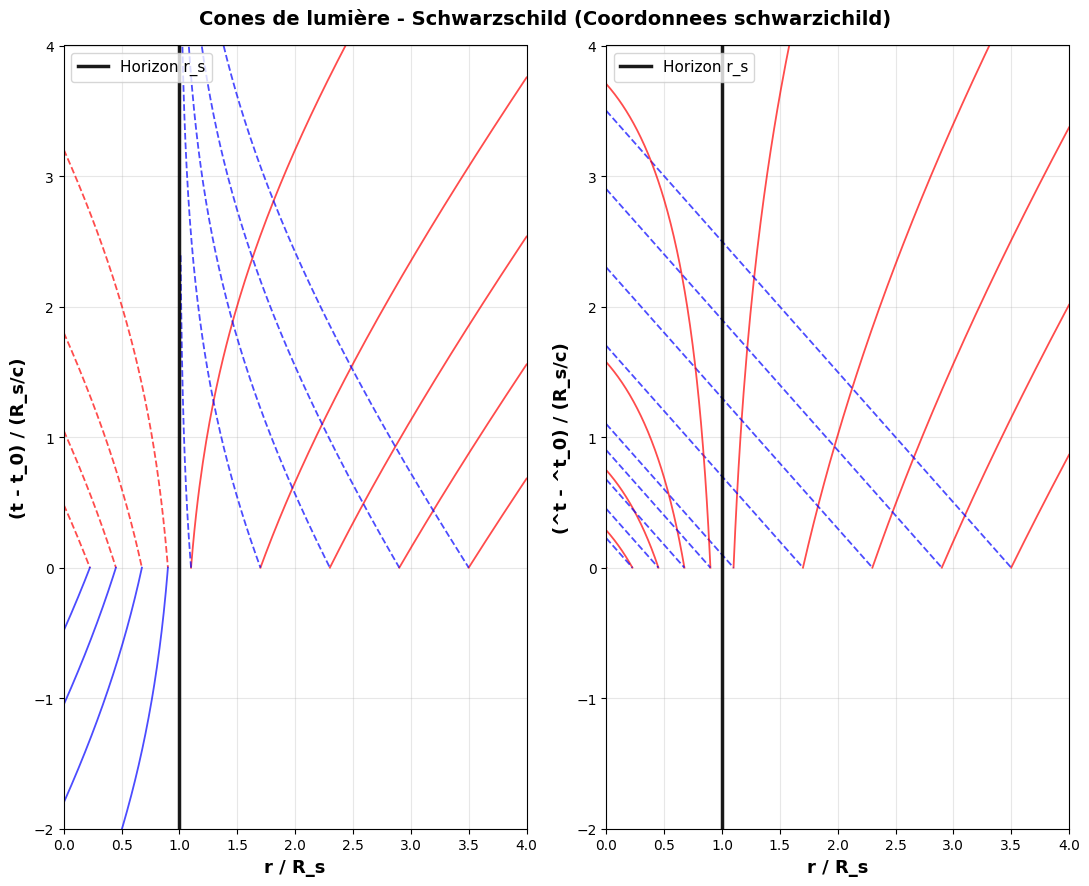

In [13]:


fig, ax = plt.subplots(1,2,figsize=(11, 9))
fig.suptitle('Cones de lumière - Schwarzschild (Coordonnees schwarzichild)', fontsize=14, fontweight='bold')

M_bh = M_sun
r_s = schwarzschild_radius(M_bh)

# Points de départ (r0, t0) décalés - pour avoir l'effet ondulant
r0_values = np.linspace(1.1*r_s, 3.5*r_s, 5)
t0 = 0
axe=ax[0]
for r0 in r0_values:
    # Géodésiques sortantes (vont vers l'extérieur)
    r_out = np.linspace(r0, 4*r_s, 200)
    t_out = schwarzchild_geo_p(t0, r0, r_out, M_bh)
    axe.plot(r_out/r_s, t_out/(r_s/c), 'r-', linewidth=1.3, alpha=0.7)
    
    # Géodésiques entrantes (vont vers l'horizon)
    r_in = np.linspace(1.01*r_s, r0, 200)  # Vont VERS r_s (décroissant)
    t_in = schwarzchild_geo_m(t0,r0, r_in, M_bh)
    t_in = t_in + t0
    axe.plot(r_in/r_s, t_in/(r_s/c), 'b--', linewidth=1.3, alpha=0.7)

r0_values_inf = np.linspace(0.001*r_s, 0.9*r_s, 5)

for r0 in r0_values_inf:
    # Géodésiques sortantes (vont vers l'extérieur)
    r_out = np.linspace( 0,r0, 200)
    t_out = schwarzchild_geo_p_inf(t0, r0, r_out, M_bh)
    axe.plot(r_out/r_s, t_out/(r_s/c), 'r--', linewidth=1.3, alpha=0.7)
    
    # Géodésiques entrantes (vont vers l'horizon)
    r_in = np.linspace(0, r0, 200)  # Vont VERS r_s (décroissant)
    t_in = schwarzchild_geo_m_inf(t0,r0, r_in, M_bh)
    t_in = t_in + t0
    axe.plot(r_in/r_s, t_in/(r_s/c), 'b-', linewidth=1.3, alpha=0.7)

# Horizon des événements
axe.axvline(1, color='black', linestyle='-', linewidth=2.5, alpha=0.9, label='Horizon r_s')


axe.set_xlabel('r / R_s', fontsize=13, fontweight='bold')
axe.set_ylabel('(t - t_0) / (R_s/c)', fontsize=13, fontweight='bold')
axe.set_xlim(0, 4)
axe.set_ylim(-2, 4)
axe.grid(True, alpha=0.3)
axe.legend(fontsize=11, loc='upper left')

ax2=ax[1]
for r0 in r0_values:
    # Géodésiques sortantes (vont vers l'extérieur)
    r_out = np.linspace(r0, 4*r_s, 200)
    t_out = ef_geo_p(t0, r0, r_out, M_bh)
    ax2.plot(r_out/r_s, t_out/(r_s/c), 'r-', linewidth=1.3, alpha=0.7)
    
    # Géodésiques entrantes (vont vers l'horizon)
    r_in = np.linspace(0, r0, 200)  # Vont VERS r_s (décroissant)
    t_in = ef_geo_m(t0,r0, r_in, M_bh)
    t_in = t_in + t0
    ax2.plot(r_in/r_s, t_in/(r_s/c), 'b--', linewidth=1.3, alpha=0.7)

for r0 in r0_values_inf:
    # Géodésiques sortantes (vont vers l'extérieur)
    r_out = np.linspace( 0,r0, 200)
    t_out = ef_geo_p(t0, r0, r_out, M_bh)
    ax2.plot(r_out/r_s, t_out/(r_s/c), 'r-', linewidth=1.3, alpha=0.7)
    
    # Géodésiques entrantes (vont vers l'horizon)
    r_in = np.linspace(0, r0, 200)  # Vont VERS r_s (décroissant)
    t_in = ef_geo_m(t0,r0, r_in, M_bh)
    t_in = t_in + t0
    ax2.plot(r_in/r_s, t_in/(r_s/c), 'b--', linewidth=1.3, alpha=0.7)

ax2.axvline(1, color='black', linestyle='-', linewidth=2.5, alpha=0.9, label='Horizon r_s')


ax2.set_xlabel('r / R_s', fontsize=13, fontweight='bold')
ax2.set_ylabel('(^t - ^t_0) / (R_s/c)', fontsize=13, fontweight='bold')
ax2.set_xlim(0, 4)
ax2.set_ylim(-2, 4)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=11, loc='upper left')
plt.tight_layout()
plt.show()

Ainsi, on a definit une coordonée qui semble etre approprié pour etudier la chute libre de la surface de l'étoile. Etudions alors la trajectoire et les connes de lumiere pour la la surface au cours de la chute avec les differents sysemes de coordonées pour mieux comprendre ce qui se passe.

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_19528\3776216645.py:19: RuntimeWarning: divide by zero encountered in log
  t = t0 + (r0 - r) / c - r_s/c*np.log(np.abs((r-r_s)/(r0-r_s)))


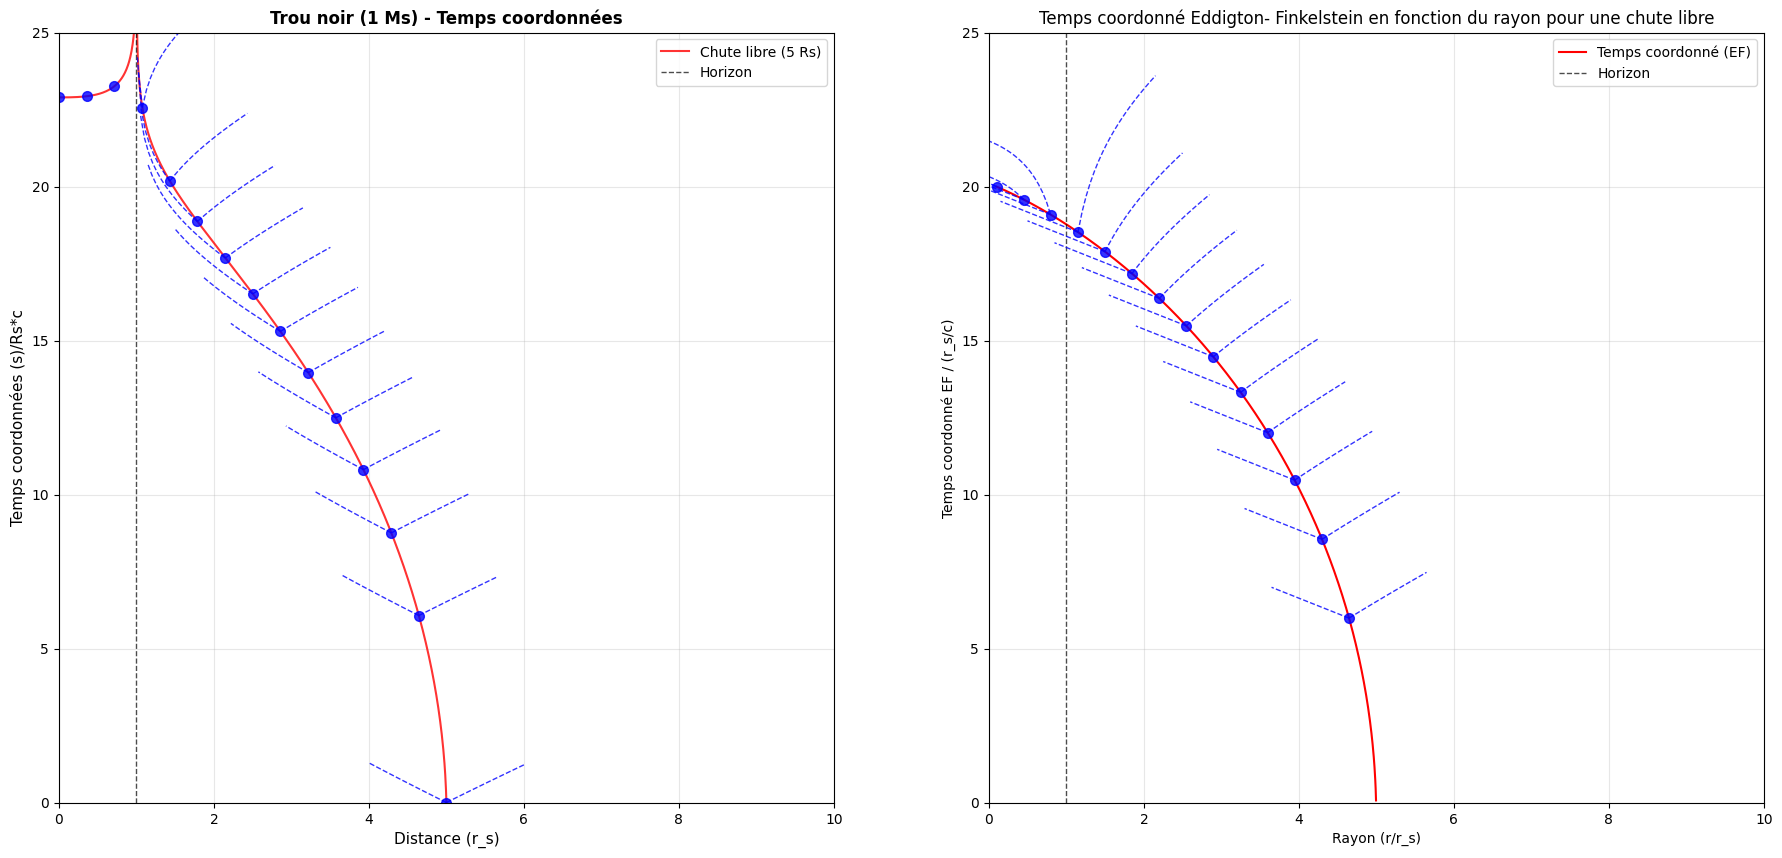

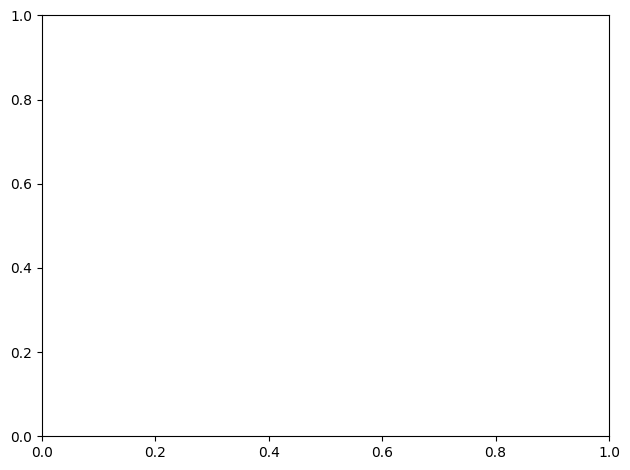

In [17]:
fig, axes = plt.subplots(1,2,figsize=(22, 10))

ax = axes[0]
M_bh = M_sun
r_s = schwarzschild_radius(M_bh)
r_bh = np.linspace(5*r_s, r_s*0.001, 1000)  # Decroissant de 5*r_s a r_s
tau_bh = ff_cordinate_time(5*r_s, r_bh, M_bh)
ax.plot(r_bh/r_s, tau_bh/r_s*c, 'r-',alpha=0.8, linewidth=1.5, label='Chute libre (5 Rs)')
ax.axvline(1, color='black', linestyle='--', linewidth=1, alpha=0.7, label='Horizon')
ax.set_xlabel('Distance (r_s)', fontsize=11)
ax.set_ylabel('Temps coordonnées (s)/Rs*c', fontsize=11)
ax.set_title('Trou noir (1 Ms) - Temps coordonnées', fontweight='bold')
ax.grid(True, alpha=0.3)

# Limites des axes: x de 0 à 25, y de 0 à 25
ax.set_xlim(0, 10)
ax.set_ylim(0, 25)

# Points régulièrement espacés SUR LA COURBE ROUGE
indices = np.linspace(0, len(r_bh)-1, 15, dtype=int)
for i in indices:
    ax.plot(r_bh[i]/r_s, tau_bh[i]/r_s*c, 'bo', markersize=7, alpha=0.8)
    if r_bh[i] > r_s:
        r_out = np.linspace(r_bh[i], r_bh[i]+r_s, 20)
        t_out = schwarzchild_geo_p(tau_bh[i], r_bh[i], r_out, M_bh)
        ax.plot(r_out/r_s, t_out/r_s*c, 'b--', linewidth=1, alpha=0.8)
        r_in = np.linspace(r_bh[i], r_bh[i]-r_s, 20)
        r_in = np.clip(r_in, r_s, None)  # Enlever les valeurs < r_s
        t_in = schwarzchild_geo_m(tau_bh[i], r_bh[i], r_in, M_bh)
        ax.plot(r_in/r_s, t_in/r_s*c, 'b--', linewidth=1, alpha=0.8)
    

ax.legend()

ax2 = axes[1]
def ff_EF_time(r0, r, M):
    """
    Calcul du temps coordonné par intégration numérique.
    r décroît de r0 vers 0, donc on separe entre les deux régions:
- r > r_s : descente vers le trou noir
- r < r_s : chute libre à l'intérieur du trou noir
    dt/dr = sqrt(1-r_s/r0) / (1-r_s/r) * (-1/(c*sqrt(r_s/r - r_s/r0)))
    """
    r_s = schwarzschild_radius(M)
    r = np.asarray(r)
    dt_dr = np.zeros_like(r, dtype=float)
    
    # Masques pour les deux régions
    mask_out = r > r_s  # Région r > r_s (reachable)
    mask_in = r < r_s   # Région r < r_s (intérieur)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        # Région extérieure
        if np.any(mask_out):
            dt_dr[mask_out] = np.sqrt(1 - r_s/r0) / (1 - r_s/r[mask_out]) * (-1) / (c * np.sqrt(r_s/r[mask_out] - r_s/r0)) + 1/c * 1/(r[mask_out]/r_s - 1)
        
        # Région intérieure
        if np.any(mask_in):
            dt_dr[mask_in] = np.sqrt(1 - r_s/r0) / (1 - r_s/r[mask_in]) * (-1) / (c * np.sqrt(r_s/r[mask_in] - r_s/r0)) + 1/c * 1/(r[mask_in]/r_s - 1)
            #dt_dr[mask_in] = np.clip(dt_dr[mask_in], -2, None)  # Clip à -2 pour régulariser à r_s
    
    dr = np.gradient(r)
    t_coord = np.cumsum((dt_dr * dr))
    t_coord += 20*r_s/c  # Normaliser pour que t=0 à r=r0
    return t_coord

fig, ax = plt.subplots()
M =  M_sun  # Masse du trou noir en kg
r_s = schwarzschild_radius(M)
r0 = 5 * r_s  # Rayon initial de chute libre

r = np.linspace(0.1 * schwarzschild_radius(M), 5 * schwarzschild_radius(M), 1000)  # Rayon de chute libre
t_coord = ff_EF_time(r0, r, M)
ax2.plot(r/r_s, t_coord/r_s*c, label='Temps coordonné (EF)',color = 'red')
ax2.axvline(1, color='black', linestyle='--', linewidth=1, alpha=0.7, label='Horizon')

ax2.set_xlabel('Rayon (r/r_s)')
ax2.set_ylabel('Temps coordonné EF / (r_s/c)')
ax2.set_title('Temps coordonné Eddigton- Finkelstein en fonction du rayon pour une chute libre')
ax2.legend()
ax2.grid(alpha=0.3)
indices = np.linspace(0, len(r)-1, 15, dtype=int)
for i in indices:
    ax2.plot(r[i]/r_s, t_coord[i]/r_s*c, 'bo', markersize=7, alpha=0.8)
    if r[i] > r_s:
        r_out = np.linspace(r[i], r[i]+r_s, 20)
        t_out = ef_geo_p(t_coord[i], r[i], r_out, M)
        ax2.plot(r_out/r_s, t_out/r_s*c, 'b--', linewidth=1, alpha=0.8)
        r_in = np.linspace(r[i], r[i]-r_s, 20)
        t_in = ef_geo_m(t_coord[i], r[i], r_in, M)
        ax2.plot(r_in/r_s, t_in/r_s*c, 'b--', linewidth=1, alpha=0.8)
    else:
        r_out = np.linspace(r[i]-r_s, r[i], 20) #ici on prend en compte le fait que les geodesiques ne peuvent pas aller au dela de r_s et decroissent vers 0
        t_out = ef_geo_p(t_coord[i], r[i], r_out, M)
        ax2.plot(r_out/r_s, t_out/r_s*c, 'b--', linewidth=1, alpha=0.8)
        r_in = np.linspace(r[i], r[i]-r_s, 20)
        r_in = np.clip(r_in, 0, None)  # Éviter les valeurs trop proches de zéro
        t_in = ef_geo_m(t_coord[i], r[i], r_in, M)
        ax2.plot(r_in/r_s, t_in/r_s*c, 'b--', linewidth=1, alpha=0.8)

# Limites des axes: x de 0 à 25, y de 0 à 25
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 25)
plt.tight_layout()


On appercoit que dans les deux systemes de coordonées, le comportement de la lumiere change en $r=R_S$. Cependant, l'intermpretation classique des trous noir est mieux retranscrite dans les coordonées de Eddington Finkelstein. Les cones de luimere se resserent et se ferment peut a peu. L"horizon" pour la surface corrspond alors au moment ou la geodesique sortante est verticale.

Cependant, le systeme de coordonées de Eddington Finkelstein n'est pas demuni de cas pathologiques et certains ont alors introduit un syteme sans aucune divergences apparentes : les coordonées de Kruskal. Pour les definir on procede de la sorte :
$$\begin{cases}
\tilde{u} = t -r^* \\
\tilde{v} = t + r^*
\end{cases}$$

Ou $r^* = r + R_S \ln \left| \frac{r}{R_S} - 1 \right|$ est la coordonnée de tortue.

Le choix de ces variables est naturellement motivé par les geodesiques nulles definies par  $$ds^2 = 0 = -\left(1 - \frac{R_s}{r}\right) dt^2 + \left(1 - \frac{R_s}{r}\right)^{-1} dr^2$$

Les geodesiques sortantes sont alors données par $\tilde{u} = \textit{cste}$ et les geodesiques entrantes par $\tilde{v} = \textit{cste}$. 
On exprime alors les termes de la metrtique en fonction de $\tilde{u}$ et $\tilde{v}$ :
$$\begin{cases}
\tilde{v} -\tilde{u} = 2r^* \\
\tilde{v} + \tilde{u} = 2t
\end{cases}$$
On a alors :
$$ds^2 = -\left(1 - \frac{R_S}{r}\right) d\tilde{u} d\tilde{v} + r^2 d\Omega^2$$

Sans aucune divergences apparentes. Cependant, dans la definition de $\tilde{u}$ et $\tilde{v}$, nous avons caché nos divergences logarythmiques. Pour se defarie de ces dernieres nous pouvons decaler les coordonées avec une fonction monotone et "re-etiqueter": $\begin{cases} \tilde{U} = F(\tilde{u}) \\ \tilde{V} = G(\tilde{v}) \end{cases}$. Apres manipulation, on peut montrer que les focntions $F$ et $G$ peuvent etre telles que :
$$\begin{cases}
\tilde{U} = -2R_S e^{-\frac{\tilde{u}}{2R_S}} \\
\tilde{V} = 2R_S e^{\frac{\tilde{v}}{2R_S}}
\end{cases}$$

La métrique s'ecrit alors : $$ds^2 = -\frac{R_S}{r} e^{-\frac{r}{R_S}} d\tilde{U} d\tilde{V} + r^2 d\Omega^2$$
On peut rendre ensuite cette metrique diagonale en posant :
$$\begin{cases}
u = \frac{1}{2}(\tilde{V} - \tilde{U}) = \left(\frac{r}{R_S} - 1\right)^{1/2}e^{-\frac{r}{2R_S}}\cosh\left(\frac{r}{2R_S}\right) \\
v = \frac{1}{2}(\tilde{V} + \tilde{U}) = \left(\frac{r}{R_S} - 1\right)^{1/2}e^{-\frac{r}{2R_S}}\sinh\left(\frac{r}{2R_S}\right)
\end{cases}$$

et pour $r<R_S$ :
$$\begin{cases}
u = \left(\frac{r}{R_S} - 1\right)^{1/2}e^{-\frac{r}{2R_S}}\sinh\left(\frac{r}{2R_S}\right) \\
v = \left(\frac{r}{R_S} - 1\right)^{1/2}e^{-\frac{r}{2R_S}}\cosh\left(\frac{r}{2R_S}\right)
\end{cases}$$

On a ainsi definit les coordonées de Kruskal-Szekeres qui sont adaptées pour etudier la chute libre de la surface de l'étoile, sans pathologies apparentes et dissimulées!

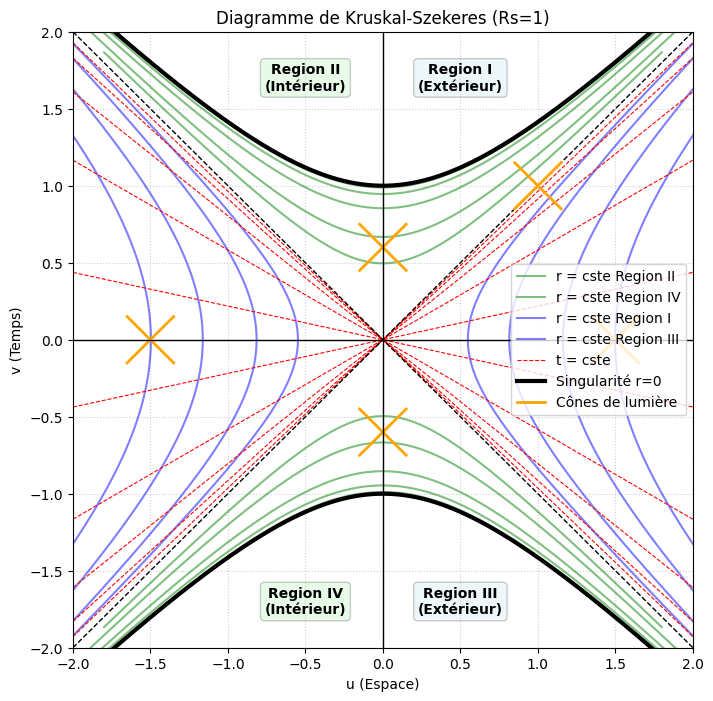

In [18]:
# Paramètres : on pose Rs = 1
def kruskal_plot():
    plt.figure(figsize=(8, 8))
    
    # Plage de valeurs pour le paramètre de tracé (rapidité)
    eta = np.linspace(-2, 2, 400)
    
    # Flags pour ajouter les labels une seule fois
    label_r_out = True
    label_r_in = True
    label_t = True
    label_cone = True
    
    # 1. Courbes à r constant (Hyperboles)
    # r > 2M (Régions I et III) : u^2 - v^2 = (r-1)e^r
    # r < 2M (Régions II et IV) : v^2 - u^2 = (1-r)e^r
    r_values = [0.2, 0.4, 0.6, 0.8, 0.9, 1.1, 1.2,1.35, 1.5, 2.0, 2.5, 3.0]
    for r in r_values:
        constant = (r - 1) * np.exp(r)
        if constant > 0: # r > Rs
            u = np.sqrt(constant) * np.cosh(eta)
            v = np.sqrt(constant) * np.sinh(eta)
            label_out = "r = cste Region I" if label_r_out else ""
            plt.plot(u, v, 'b', alpha=0.5, label=label_out)  # Région I
            label_in = "r = cste Region III" if label_r_out else ""
            plt.plot(-u, v, 'b', alpha=0.5, label=label_in) # Région III
            label_r_out = False
        else: # r < Rs
            u = np.sqrt(abs(constant)) * np.sinh(eta)
            v = np.sqrt(abs(constant)) * np.cosh(eta)
            label_ii = "r = cste Region II" if label_r_in else ""
            plt.plot(u, v, 'g', alpha=0.5, label=label_ii)  # Région II
            label_iv = "r = cste Region IV" if label_r_in else ""
            plt.plot(u, -v, 'g', alpha=0.5, label=label_iv) # Région IV
            label_r_in = False

    # 2. Courbes à t constant (Droites passant par l'origine)
    # v/u = tanh(t/2) ou u/v = tanh(t/2)
    t_values = np.linspace(-2, 2, 10)
    u_range = np.linspace(-2, 2, 100)
    for t in t_values:
        slope = np.tanh(t)
        label_t_str = "t = cste" if label_t else ""
        plt.plot(u_range, slope * u_range, 'r--', linewidth=0.8, label=label_t_str)
        label_t = False

    # 3. Singularités (r = 0) : v^2 - u^2 = 1
    u_sing = np.linspace(-2, 2, 400)
    v_sing = np.sqrt(1 + u_sing**2)
    plt.plot(u_sing, v_sing, 'k', linewidth=3, label="Singularité r=0")
    plt.plot(u_sing, -v_sing, 'k', linewidth=3)

    # 4. Horizons (r = 2M) : v = +/- u
    plt.plot([-2, 2], [-2, 2], 'k--', linewidth=1)
    plt.plot([-2, 2], [2, -2], 'k--', linewidth=1)

    # 5. Étiquettes des régions
    plt.text(0.5, 1.7, 'Region I\n(Extérieur)', fontsize=10, fontweight='bold', 
             ha='center', va='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.2))
    plt.text(-0.5, 1.7, 'Region II\n(Intérieur)', fontsize=10, fontweight='bold',
             ha='center', va='center', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.2))
    plt.text(0.5, -1.7, 'Region III\n(Extérieur)', fontsize=10, fontweight='bold',
             ha='center', va='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.2))
    plt.text(-0.5, -1.7, 'Region IV\n(Intérieur)', fontsize=10, fontweight='bold',
             ha='center', va='center', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.2))
    
    # 6. AJOUT DES CÔNES DE LUMIÈRE (du/dv = ±1)
    # On place des petits cônes à des points stratégiques
    label_cone = True
    cone_size = 0.15
    grid_points = [
        (1.5, 0),    # Région I (Extérieur)
        (-1.5, 0),   # Région III (Autre extérieur)
        (0, 0.6),    # Région II (Trou noir)
        (0, -0.6),   # Région IV (Trou blanc)
        (1.0, 1.0)   # Sur l'horizon
    ]
    
    for (u0, v0) in grid_points:
        # Droites v = u + c et v = -u + c
        label_cone_str = "Cônes de lumière" if label_cone else ""
        plt.plot([u0-cone_size, u0+cone_size], [v0-cone_size, v0+cone_size], 'orange', lw=2, label=label_cone_str)
        plt.plot([u0-cone_size, u0+cone_size], [v0+cone_size, v0-cone_size], 'orange', lw=2)
        label_cone = False
        

    # Cosmétique
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xlabel('u (Espace)')
    plt.ylabel('v (Temps)')
    plt.title('Diagramme de Kruskal-Szekeres (Rs=1)')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.legend(loc = 'right')
    plt.show()

kruskal_plot()


Ici geodesiques en kruskal aussi

Etudions alors les trajectoires de notre surface en chute libre dans ce systeme de coordonées:

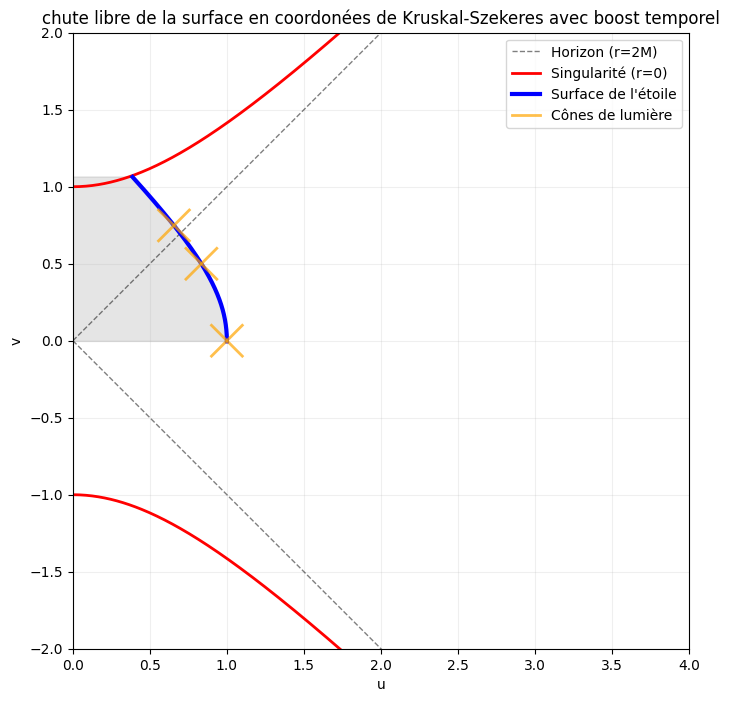

In [19]:
M = 0.5
rs = 1.0  # Rayon de Schwarzschild
Ri = 10.0 * M  # Rayon initial (5.0 dans ces unités)
dt_shift = 44 * M  # Décalage temporel spécifié dans le document

def generate_kruskal_path():
    # 1. Paramétrage cycloïdal (eta de 0 à pi)
    eta = np.linspace(0, np.pi - 0.001, 2000)
    r = (Ri / 2) * (1 + np.cos(eta))
    
    # 2. Calcul des termes de temps (MTW 31.10)
    k = np.sqrt(Ri/rs - 1)
    # Partie régulière de t/rs
    t_reg = k * (eta + (Ri/(2*rs)) * (eta + np.sin(eta)))
    
    # 3. Calcul de V+U et V-U pour éviter la divergence
    # V+U = exp((t + r*)/2rs)
    # V-U = +/- exp(-(t - r*)/2rs)
    # On gère analytiquement le produit exp(log|r-rs|) * sqrt|r-rs|
    
    # Terme de l'horizon : tan(eta/2) vaut k quand r = rs
    # On utilise la simplification : sqrt(r/rs - 1) * exp(t/2rs)
    # qui reste finie à l'horizon.
    
    # t_log = rs * ln |(k + tan)/(k - tan)|
    # r_star_log = rs * ln |r/rs - 1|
    
    # Le terme combiné (t + r*)/(2rs) sans les logs divergents :
    # On calcule l'argument de l'exponentielle de manière stable
    exp_arg_plus = (t_reg + r/rs) / 2.0
    
    # Facteur correcteur pour les logs :
    # sqrt|r/rs-1| * exp(0.5 * ln|(k+tan)/(k-tan)|)
    with np.errstate(divide='ignore', invalid='ignore'):
        term_corr = np.sqrt(np.abs(r/rs - 1)) * np.sqrt(np.abs((k + np.tan(eta/2)) / (k - np.tan(eta/2))))
    
    # Coordonnées de Kruskal de base (non boostées)
    # On multiplie par exp(r/2rs) qui vient de r*
    A = np.exp(exp_arg_plus) * term_corr * np.exp(r/(2*rs)) # C'est V+U
    B = (r/rs - 1) * np.exp(r/rs) / A # C'est V-U via la relation métrique
    
    U_base = (A - B) / 2
    V_base = (A + B) / 2
    
    # 4. Application de la translation temporelle (t -> t + 42.8M)
    # Cela correspond à une transformation de Lorentz (boost) dans le plan (U, V)
    alpha = dt_shift / (2 * rs)
    U = U_base * np.cosh(alpha) - V_base * np.sinh(alpha)
    V = V_base * np.cosh(alpha) - U_base * np.sinh(alpha)
    
    return U, V

# --- Tracé du graphique ---
U, V = generate_kruskal_path()

# Clipping de la trajectoire pour ne pas dépasser la singularité (v² - u² = 1)
singularity_distance = V**2 - U**2  # Distance à la singularité
clip_mask = singularity_distance <0.99  # Garder seulement les points avant la singularité (avec marge)
U_clipped = U[clip_mask]
V_clipped = V[clip_mask]

fig, ax = plt.subplots(figsize=(8, 8))

# Horizon (r=2M)
ax.plot([0, 5], [0, 5], 'k--', lw=1, alpha=0.5, label="Horizon (r=2M)")
ax.plot([0, 5], [0, -5], 'k--', lw=1, alpha=0.5)

# Singularité (r=0) -> V^2 - U^2 = 1
u_s = np.linspace(-5, 5, 1000)
v_s = np.sqrt(1 + u_s**2)
ax.plot(u_s, v_s, 'r', lw=2, label="Singularité (r=0)")

u_s2 = np.linspace(-5, 5, 1000)
v_s2 = -np.sqrt(1 + u_s2**2)
ax.plot(u_s2, v_s2, 'r', lw=2)


# Surface de l'étoile (courbe clippée)
ax.plot(U_clipped, V_clipped, 'b', lw=3, label="Surface de l'étoile")
ax.fill_betweenx(V_clipped, -5, U_clipped, color='gray', alpha=0.2) # Zone intérieure

# Cônes de lumière à des valeurs spécifiques de v (1.0, 0.75, 0.5)
v_targets = [ 0.75, 0.5]
cone_points = [(1, 0, 0)]  # Ajouter le point d'origine pour les cônes à l'horizon

for v_target in v_targets:
    # Trouver l'indice le plus proche de v_target
    idx = np.argmin(np.abs(V - v_target))
    if idx < len(U):
        cone_points.append((U[idx], V[idx], v_target))

# Tracer les cônes
for cone_idx, (u0, v0, v_label) in enumerate(cone_points):
    # Cône sortant (pente +1 : v = u + cste)
    u_cone_out = np.linspace(u0 - 0.1, u0 + 0.10, 100)
    v_cone_out = u_cone_out + (v0 - u0)
    
    # Cône entrant (pente -1 : v = -u + cste)
    u_cone_in = np.linspace(u0 - 0.1, u0 + 0.10, 100)
    v_cone_in = -u_cone_in + (v0 + u0)
    
    # Ajouter le label uniquement sur le premier cône
    label_str = "Cônes de lumière" if cone_idx == 0 else ""
    ax.plot(u_cone_out, v_cone_out, 'orange', lw=2, alpha=0.7, label=label_str)
    ax.plot(u_cone_in, v_cone_in, 'orange', lw=2, alpha=0.7)
    
    # Marquer le point sur la trajectoire
    ax.plot(u0, v0, color='orange', markersize=6)

# Échelles identiques à l'image (b)
ax.set_xlim(0, 4)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_title('chute libre de la surface en coordonées de Kruskal-Szekeres avec boost temporel')
ax.legend()
ax.grid(True, alpha=0.2)

# III. Dynamique d'effondrement d'une étoile

Le théorème de **Birkhoff** précise que la métrique en dehors de l'étoile en effondrement est la **métrique de Schwarzschild**, due à la symétrie du système et à la statique de la géométrie extérieure.


## A) Solution extérieure

**Métrique de Schwarzschild :**
$$ds^2 = -\left(1 - \frac{R_g}{R}\right) c^2 dt^2 + \left(1 - \frac{R_g}{R}\right)^{-1} dR^2 + R^2 d\Omega^2$$

On note $\lambda$ le paramètre affine et $R_g = \frac{2MG}{c^2}$.

$\mathcal{L} = \frac{1}{2} g_{\mu\nu} \dot{x}^\mu \dot{x}^\nu$ avec $g_{\mu\nu} = \begin{pmatrix} 1-\frac{R_g}{R} & 0 & 0 & 0 \\ 0 & \frac{1}{1-\frac{R_g}{R}} & 0 & 0 \\ 0 & 0 & R^2 & 0 \\ 0 & 0 & 0 & R^2 \sin^2 \theta \end{pmatrix}$

$$\mathcal{L} = \frac{1}{2} \left[ \left(1 - \frac{R_g}{R}\right) \left(\frac{dT}{d\lambda}\right)^2 + \frac{1}{1 - \frac{R_g}{R}} \left(\frac{dR}{d\lambda}\right)^2 + R^2 \left(\frac{d\theta}{d\lambda}\right)^2 + R^2 \sin^2 \theta \left(\frac{d\varphi}{d\lambda}\right)^2 \right]$$

**Équations d'Euler-Lagrange :** $\frac{d}{d\lambda} \left( \frac{\partial \mathcal{L}}{\partial \dot{x}^\mu} \right) = \frac{\partial \mathcal{L}}{\partial x^\mu}$

$$
\begin{cases} 
\frac{d}{d\lambda} \left[ (1 - \frac{R_g}{R}) \frac{dT}{d\lambda} \right] = 0 \\
\frac{d}{d\lambda} \left( R^2 \sin^2 \theta \frac{d\varphi}{d\lambda} \right) = 0 \\
\frac{d}{d\lambda} \left( R^2 \frac{d\theta}{d\lambda} \right) = R^2 \sin(2\theta) \left( \frac{d\varphi}{d\lambda} \right)^2 \\
\frac{d}{d\lambda} \left( \frac{1}{1 - \frac{R_g}{R}} \frac{dR}{d\lambda} \right) = -\frac{R_g}{2R^2} \left[ \left(\frac{dT}{d\lambda}\right)^2 + \frac{1}{(1 - \frac{R_g}{R})^2} \left(\frac{dR}{d\lambda}\right)^2 \right] + 2R \left[ \left(\frac{d\theta}{d\lambda}\right)^2 + \sin^2 \theta \left(\frac{d\varphi}{d\lambda}\right)^2 \right]
\end{cases}
$$

On se place dans le plan équatorial : $\theta = \frac{\pi}{2}$, $\dot{\theta} = 0$. D'où :

$$
\begin{cases} 
(1 - \frac{R_g}{R}) \dot{T} = \frac{\mathcal{E}}{c^2} \\
R^2 \dot{\varphi} = \mathcal{L} \\
\frac{d}{d\lambda} (R^2 \dot{\theta}) = 0
\end{cases}
$$

D'où en utilisant la norme du quadrivecteur vitesse : 

$$-Kc^2 = g_{\mu\nu} u^\mu u^\nu = -\left(1 - \frac{R_g}{R}\right) (c\dot{T})^2 + \frac{\dot{R}^2}{1 - \frac{R_g}{R}} + R^2 \dot{\theta}^2 + R^2 \dot{\varphi}^2$$

$$\Leftrightarrow -Kc^2 = -\left(1 - \frac{R_g}{R}\right)^{-1} \frac{\mathcal{E}^2}{c^2} + \left(1 - \frac{R_g}{R}\right)^{-1} \dot{R}^2 + \frac{\mathcal{L}^2}{R^2}$$

$$\Leftrightarrow \dot{R}^2 = \frac{\mathcal{E}^2}{c^2} - Kc^2 + Kc^2 \frac{R_g}{R} - \frac{\mathcal{L}^2}{R^2} + \frac{\mathcal{L}^2 R_g}{R^3}$$


Pour un observateur doté d'un mouvement radial : $\mathcal{L} = 0$, $K = 1$.

$$\Rightarrow \dot{R}^2 = \frac{\mathcal{E}^2}{c^2} - c^2 \left(1 - \frac{R_g}{R}\right)$$

Condition initiale : $\dot{R}(0) = 0$ en $R_0$, soit $\frac{\mathcal{E}^2}{c^2} = c^2 \left(1 - \frac{R_g}{R_0}\right)$.

L'équation des géodésiques radiales est :
> **$$R \dot{R}^2 + c^2 \frac{R_g}{R_0} R = c^2 R_g$$**


## B) Solution intérieure

**Métrique de Friedmann-Lemaître-Robertson-Walker (FLRW) :**
$$ds^2 = -c^2 dt^2 + a^2(t) \left[ \frac{dr^2}{1 - kr^2} + r^2 d\Omega^2 \right] \quad \text{avec } k \in \{0, -1, +1\}$$

Elle représente un espace-temps homogène et isotrope en contraction.

* **Fluide comobile :** Le fluide est au repos par rapport à la géométrie, soit $\vec{u} = u^0 \vec{e}_0$.
    $(u^0)^2 g_{00} = -c^2 \implies u^0 = \frac{c}{\sqrt{-g_{00}}} = c$.
    Par conséquent, le temps propre et le temps de FLRW sont identiques.

* **Fluide parfait :** $T_{\mu\nu} = \rho u_\mu u_\nu$ avec pression $p=0$.
    Conservation de l'énergie : $\nabla_\mu T^\mu{}_\nu = 0 \Leftrightarrow \nabla_\mu (g^{\mu\sigma} T_{\sigma\nu}) = 0$.

    **Équation de Friedmann (conservation) :** $\dot{\rho} + 3 \frac{\dot{a}}{a} \rho = 0$.
    Ce qui donne : $\rho(t) = \rho_0 \left( \frac{a_0}{a(t)} \right)^3$.

* **Équation d'Einstein :** $G_{\mu\nu} = \frac{8\pi G}{c^4} T_{\mu\nu}$.
    La composante $G_{00} = \frac{8\pi G}{c^4} T_{00}$ donne :
    $$\left(\frac{\dot{a}}{a}\right)^2 + \frac{kc^2}{a^2} = \frac{8\pi G}{3} \rho$$

    $$\Rightarrow \boxed{a \dot{a}^2 + kc^2 a = \frac{8\pi G}{3} \rho_0 a_0^3}$$
    Note : $k=1$ dans un tel espace-temps (effondrement d'une sphère de courbure intrinsèque positive).

**C) Surface limitrophe**

En $r = r_s$, surface amovible pour la solution intérieur au repos.

On veut une continuité parfaite entre les deux solutions :
* **Intérieur** à $r = r_s$ : $ds^2 = -c^2 d\tau^2 + a(t)^2 x_s^2 d\Omega^2$
* **Extérieur** : $ds^2 = -c^2 \left( 1 - \frac{R_g}{R} \right) dT^2 + \frac{dR^2}{1 - \frac{R_g}{R}} + R^2 d\Omega^2$

D'où, par identification :
$$R(t) = a(t) x_s$$
$$d\tau^2 = \left( 1 - \frac{R_g}{R} \right) dT^2 - \frac{dR^2}{c^2 \left( 1 - \frac{R_g}{R} \right)}$$

$$\frac{dR}{dt} = \dot{a} r_s$$

Donc, $$\left( \frac{dT}{d\tau} \right)^2 = \frac{1}{1 - \frac{R_g}{R(t)}} \left( 1 + \frac{(\frac{dR}{d\tau})^2}{c^2 (1 - \frac{R_g}{R(t)})} \right)$$
$$\Leftrightarrow c dT = \frac{d\tau}{\sqrt{1 - \frac{R_g}{R}}} \sqrt{ 1 + \frac{(\dot{R}/c)^2}{(1 - R_g/R)} }$$
$$\Rightarrow dT = d\tau \sqrt{ \frac{ 1 + \frac{\dot{a}^2 r_s^2}{c^2 (1 - R_g / (a(t) r_s))} }{ 1 - \frac{R_g}{a(t) r_s} } }$$

On rappelle $\dot{a}^2 + k c^2 a = \frac{8 \pi G}{3} \rho_0 a^3$

Donc, $$\frac{R}{r_s} \frac{\dot{R}^2}{r_s^2} + k c^2 \frac{R}{r_s} = \frac{8 \pi G}{3} \rho_0 \frac{R^3}{r_s^3}$$
$$ie \quad R \dot{R}^2 + k c^2 R r_s^2 = \frac{8 \pi G}{3} \rho_0 R^3$$

On compare à la $1^{ere}$ équation radiale : $R \dot{R}^2 + c^2 \frac{R_g}{R_0} R = c^2 R_g$ puisque $\tau$ est le temps propre partout et la surface suit une géodésique radiale.

$$\begin{cases} k c^2 x_s^2 = \frac{R_g}{R_0} c^2 \\ \frac{8 \pi G}{3} \rho_0 R_0^3 = c^2 R_g \end{cases} \Rightarrow \begin{cases} M = \frac{k R_0 r_s^2 c^2}{2 G} \\ M = \frac{4 \pi}{3} R_0^3 \rho_0 \end{cases} \Rightarrow \begin{cases} r_s = \frac{R_0}{c} \sqrt{\frac{8 \pi G}{3} \rho_0} & (k = 1) \\ M = \frac{4 \pi}{3} R_0^3 \rho_0 \end{cases}$$